# Project: Predicting NFL Over/Under Outcomes Using Machine Learning

**Research Question:** Can machine learning models accurately predict if an Over will hit for NFL games?

**Organizational Need:** This project aims to demonstrate that machine learning models can predict whether an Over will hit in NFL games, exceeding the breakeven threshold of 52.4% required by the -110 odds. By utilizing historical performance, weather conditions, and other variables, the model provides actionable insights for sports bettors and industry stakeholders.

## Business Understanding

 **Objective**
 * Predict NFL game over/under outcomes and evaluate the profitability of a betting strategy.

**Goals**
* Identify the features and conditions influencing over/under outcomes.
* Build a model to predict whether the total points will exceed or fall short of the betting line.
* Assess the financial viability of implementing the predictions in a betting scenario.

**Key Metrics**
* Model performance: Accuracy, ROC AUC, and classification metrics.
* Financial performance: Total profit/loss, win rate, and cumulative profit/loss from betting strategy.

## Data Understanding

### Data Sources

In [486]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# File paths
SCORES_FILE = r"C:\\Users\\mprescher\\Desktop\\D195\\scores.csv"
STADIUMS_FILE = r"C:\\Users\\mprescher\\Desktop\\D195\\nfl_stadiums.csv"
TEAMS_FILE = r"C:\\Users\\mprescher\\Desktop\\D195\\nfl_teams.csv"
STATS_FILE = r"C:\\Users\\mprescher\\Desktop\\D195\\team_stats_2003_2023.csv"

# Load data
nfl_scores = pd.read_csv(SCORES_FILE, encoding='latin1')
nfl_stadiums = pd.read_csv(STADIUMS_FILE, encoding='latin1')
nfl_teams = pd.read_csv(TEAMS_FILE, encoding='latin1')
nfl_stats = pd.read_csv(STATS_FILE, encoding='latin1')

### Initial Exploration

#### Stadiums Data (nfl_stadiums)

In [487]:
# Check the shape
nfl_stadiums.shape

(120, 16)

In [488]:
# Check the data types
nfl_stadiums.dtypes

stadium_name                        object
stadium_location                    object
stadium_open                       float64
stadium_close                      float64
stadium_type                        object
stadium_address                     object
stadium_weather_station_zipcode     object
stadium_weather_type                object
stadium_capacity                    object
stadium_surface                     object
stadium_weather_station             object
stadium_weather_station_name        object
stadium_latitude                   float64
stadium_longitude                  float64
stadium_azimuthangle               float64
stadium_elevation                  float64
dtype: object

In [489]:
# Check for null values
print(nfl_stadiums.isnull().sum())

stadium_name                        0
stadium_location                    0
stadium_open                       30
stadium_close                      79
stadium_type                        0
stadium_address                     0
stadium_weather_station_zipcode    12
stadium_weather_type                3
stadium_capacity                   36
stadium_surface                    22
stadium_weather_station            39
stadium_weather_station_name       38
stadium_latitude                   25
stadium_longitude                  25
stadium_azimuthangle               40
stadium_elevation                  30
dtype: int64


#### NFL Scores (nfl_scores)

In [490]:
# Check the shape
nfl_scores.shape

(14073, 17)

In [491]:
# Check the data types
nfl_scores.dtypes

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
dtype: object

In [492]:
# Check for null values
print(nfl_scores.isnull().sum())

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home               272
score_away               272
team_away                  0
team_favorite_id        2751
spread_favorite         2751
over_under_line         2761
stadium                    0
stadium_neutral            0
weather_temperature     1548
weather_wind_mph        1564
weather_humidity        5597
weather_detail         10946
dtype: int64


#### NFL Teams (nfl_teams)

In [493]:
# Check the shape
nfl_teams.shape

(44, 8)

In [494]:
# Check the data types
nfl_teams.dtypes

team_name                  object
team_name_short            object
team_id                    object
team_id_pfr                object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
dtype: object

In [495]:
# Check for null values
print(nfl_teams.isnull().sum())

team_name                  0
team_name_short            0
team_id                    0
team_id_pfr                0
team_conference            0
team_division              9
team_conference_pre2002    0
team_division_pre2002      2
dtype: int64


#### NFL Statitics (nfl_stats)

In [496]:
# Check the Shape
nfl_stats.shape

(672, 35)

In [497]:
# Check the data types
nfl_stats.dtypes

year                      int64
team                     object
wins                      int64
losses                    int64
win_loss_perc           float64
points                    int64
points_opp                int64
points_diff               int64
mov                     float64
g                         int64
total_yards               int64
plays_offense             int64
yds_per_play_offense    float64
turnovers                 int64
fumbles_lost              int64
first_down                int64
pass_cmp                  int64
pass_att                  int64
pass_yds                  int64
pass_td                   int64
pass_int                  int64
pass_net_yds_per_att    float64
pass_fd                   int64
rush_att                  int64
rush_yds                  int64
rush_td                   int64
rush_yds_per_att        float64
rush_fd                   int64
penalties                 int64
penalties_yds             int64
pen_fd                    int64
score_pc

In [498]:
# Check the null values
print(nfl_stats.isnull().sum())

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64


## Data Preparation

### Data Cleaning

#### Convert and Clean Stadiums Data

In [499]:
nfl_stadiums['stadium_capacity'] = nfl_stadiums['stadium_capacity'].str.replace(',', '').astype(float)
nfl_stadiums = nfl_stadiums.drop(columns=['stadium_open', 'stadium_close'])

#### Convert and Clean Scores Data

In [500]:
# Only keep rows where over_under_line is present
nfl_scores['over_under_line'] = nfl_scores['over_under_line'].replace(' ', np.nan)

# Convert data types and clean columns
nfl_scores['schedule_week'] = nfl_scores['schedule_week'].replace(
    {'Wildcard': 19, 'Division': 20, 'Conference': 21, 'Superbowl': 22}).astype(int)
nfl_scores['schedule_date'] = pd.to_datetime(nfl_scores['schedule_date'])
nfl_scores['over_under_line'] = nfl_scores['over_under_line'].astype(float)
nfl_scores['weather_detail'] = nfl_scores['weather_detail'].fillna('None')

# Filter for seasons from 2003 onwards
nfl_scores = nfl_scores[nfl_scores['schedule_season'] >= 2003].reset_index(drop=True)

#### Merging Datasets

In [501]:
merged_df = pd.merge(nfl_scores, nfl_stadiums, left_on='stadium', right_on='stadium_name')

# Fill weather data for indoor games
merged_df.loc[merged_df['stadium_type'] == 'indoor', ['weather_temperature', 'weather_wind_mph', 'weather_humidity']] = [70, 0, 40]

# Drop columns with too many missing values
columns_to_drop = ['stadium_weather_station', 'stadium_weather_station_name', 'stadium_weather_station_zipcode', 'stadium_azimuthangle', 'stadium_name', 'stadium_address']
merged_df = merged_df.drop(columns=columns_to_drop)

# Drop rows with missing 'stadium_elevation' and 'stadium_weather_type'
merged_df.dropna(subset=['stadium_elevation', 'stadium_weather_type'], inplace=True)

merged_df.head()

schedule_date  schedule_season  schedule_week  schedule_playoff  \
0    2003-09-04             2003              1             False   
1    2003-09-07             2003              1             False   
2    2003-09-07             2003              1             False   
3    2003-09-07             2003              1             False   
4    2003-09-07             2003              1             False   

             team_home  score_home  score_away             team_away  \
0  Washington Redskins        16.0        13.0         New York Jets   
1        Buffalo Bills        31.0         0.0  New England Patriots   
2    Carolina Panthers        24.0        23.0  Jacksonville Jaguars   
3   Cincinnati Bengals        10.0        30.0        Denver Broncos   
4     Cleveland Browns         6.0         9.0    Indianapolis Colts   

  team_favorite_id  spread_favorite  over_under_line                  stadium  \
0              WAS             -3.0             40.0              FedEx Field   
1              BUF             -1.0             44.5     Ralph Wilson Stadium   
2              CAR             -4.0             34.5  Bank of America Stadium   
3              DEN             -6.0             43.5       Paul Brown Stadium   
4              IND             -2.0             48.0      FirstEnergy Stadium   

   stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity  \
0            False                 74.0               9.0              89.0   
1            False                 64.0              11.0              82.0   
2            False                 67.0               9.0              79.0   
3            False                 65.0               5.0              75.0   
4            False                 65.0               4.0              72.0   

  weather_detail  stadium_location stadium_type stadium_weather_type  \
0           None      Landover, MD      outdoor             moderate   
1           None  Orchard Park, NY      outdoor                 cold   
2           None     Charlotte, NC      outdoor             moderate   
3           None    Cincinnati, OH      outdoor                 cold   
4           None     Cleveland, OH      outdoor                 cold   

   stadium_capacity stadium_surface  stadium_latitude  stadium_longitude  \
0           79000.0           Grass         38.907778         -76.864444   
1           73967.0       FieldTurf         42.889000         -78.890100   
2           73778.0           Grass         35.225833         -80.852778   
3           65515.0       FieldTurf         39.095000         -84.516000   
4           68000.0           Grass         41.506111         -81.699444   

   stadium_elevation  
0               15.2  
1              178.0  
2              221.9  
3              193.9  
4              238.0

#### Imputing Missing Weather Data

In [502]:
from sklearn.ensemble import RandomForestRegressor

# Add 'year', 'month', and 'day' columns
merged_df = merged_df.assign(year=merged_df['schedule_date'].dt.year, month=merged_df['schedule_date'].dt.month, day=merged_df['schedule_date'].dt.day).drop('schedule_date', axis=1)

# Function for imputing missing data with RandomForest
def impute_missing_weather(df, target):
    features = ['stadium_longitude', 'stadium_latitude', 'year', 'month', 'day']
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    train_data = df[df[target].notnull()]
    test_data = df[df[target].isnull()]
    
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    df.loc[df[target].isnull(), target] = predictions
    return df

merged_df = impute_missing_weather(merged_df, 'weather_humidity')
merged_df = impute_missing_weather(merged_df, 'weather_wind_mph')
merged_df = impute_missing_weather(merged_df, 'weather_temperature')

merged_df.head()

schedule_season  schedule_week  schedule_playoff            team_home  \
0             2003              1             False  Washington Redskins   
1             2003              1             False        Buffalo Bills   
2             2003              1             False    Carolina Panthers   
3             2003              1             False   Cincinnati Bengals   
4             2003              1             False     Cleveland Browns   

   score_home  score_away             team_away team_favorite_id  \
0        16.0        13.0         New York Jets              WAS   
1        31.0         0.0  New England Patriots              BUF   
2        24.0        23.0  Jacksonville Jaguars              CAR   
3        10.0        30.0        Denver Broncos              DEN   
4         6.0         9.0    Indianapolis Colts              IND   

   spread_favorite  over_under_line                  stadium  stadium_neutral  \
0             -3.0             40.0              FedEx Field            False   
1             -1.0             44.5     Ralph Wilson Stadium            False   
2             -4.0             34.5  Bank of America Stadium            False   
3             -6.0             43.5       Paul Brown Stadium            False   
4             -2.0             48.0      FirstEnergy Stadium            False   

   weather_temperature  weather_wind_mph  weather_humidity weather_detail  \
0                 74.0               9.0              89.0           None   
1                 64.0              11.0              82.0           None   
2                 67.0               9.0              79.0           None   
3                 65.0               5.0              75.0           None   
4                 65.0               4.0              72.0           None   

   stadium_location stadium_type stadium_weather_type  stadium_capacity  \
0      Landover, MD      outdoor             moderate           79000.0   
1  Orchard Park, NY      outdoor                 cold           73967.0   
2     Charlotte, NC      outdoor             moderate           73778.0   
3    Cincinnati, OH      outdoor                 cold           65515.0   
4     Cleveland, OH      outdoor                 cold           68000.0   

  stadium_surface  stadium_latitude  stadium_longitude  stadium_elevation  \
0           Grass         38.907778         -76.864444               15.2   
1       FieldTurf         42.889000         -78.890100              178.0   
2           Grass         35.225833         -80.852778              221.9   
3       FieldTurf         39.095000         -84.516000              193.9   
4           Grass         41.506111         -81.699444              238.0   

   year  month  day  
0  2003      9    4  
1  2003      9    7  
2  2003      9    7  
3  2003      9    7  
4  2003      9    7

#### Combining with Team Stats Data

In [503]:
# Prefix columns for clarity
nfl_stats_trim_home = nfl_stats.add_prefix('home_').rename(columns={'home_year': 'year', 'home_team': 'team_home'})
nfl_stats_trim_away = nfl_stats.add_prefix('away_').rename(columns={'away_year': 'year', 'away_team': 'team_away'})

# Merge for home and away teams
combined_df = pd.merge(merged_df, nfl_stats_trim_home, on=['year', 'team_home'], how='left')
combined_df = pd.merge(combined_df, nfl_stats_trim_away, on=['year', 'team_away'], how='left')

# Map team names to divisions and conferences
team_to_division = nfl_teams.set_index('team_name')['team_division'].to_dict()
team_to_conference = nfl_teams.set_index('team_name')['team_conference'].to_dict()

combined_df['home_team_division'] = combined_df['team_home'].map(team_to_division)
combined_df['away_team_division'] = combined_df['team_away'].map(team_to_division)
combined_df['home_team_conference'] = combined_df['team_home'].map(team_to_conference)
combined_df['away_team_conference'] = combined_df['team_away'].map(team_to_conference)

combined_df['division_game'] = (combined_df['home_team_division'] == combined_df['away_team_division']).astype(int)
combined_df['conference_game'] = (combined_df['home_team_conference'] == combined_df['away_team_conference']).astype(int)

combined_df = combined_df.drop(columns=['home_team_division', 'away_team_division', 'home_team_conference', 'away_team_conference'])

# Drop unnecessary columns before further processing
columns_to_drop = ['team_home', 'team_away', 'team_favorite_id', 'home_ties', 'away_ties', 'stadium', 'stadium_location']
combined_df = combined_df.drop(columns=columns_to_drop)

# Filter final dataset and convert boolean columns to integers
nfl_data = combined_df.dropna()
boolean_cols = ['stadium_neutral', 'division_game', 'conference_game']
nfl_data[boolean_cols] = nfl_data[boolean_cols].astype(int)

C:\Users\mprescher\AppData\Local\Temp\ipykernel_19648\3003981146.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Feature Engineering

#### Creating over_hit

In [504]:
# over_hit will be the target variable of the model 
nfl_data['over_hit'] = (nfl_data['score_home'] + nfl_data['score_away'] > nfl_data['over_under_line']).astype(int)

C:\Users\mprescher\AppData\Local\Temp\ipykernel_19648\800325172.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [505]:
nfl_data.head()

schedule_season  schedule_week  schedule_playoff  score_home  score_away  \
0             2003              1             False        16.0        13.0   
1             2003              1             False        31.0         0.0   
2             2003              1             False        24.0        23.0   
3             2003              1             False        10.0        30.0   
4             2003              1             False         6.0         9.0   

   spread_favorite  over_under_line  stadium_neutral  weather_temperature  \
0             -3.0             40.0                0                 74.0   
1             -1.0             44.5                0                 64.0   
2             -4.0             34.5                0                 67.0   
3             -6.0             43.5                0                 65.0   
4             -2.0             48.0                0                 65.0   

   weather_wind_mph  weather_humidity weather_detail stadium_type  \
0               9.0              89.0           None      outdoor   
1              11.0              82.0           None      outdoor   
2               9.0              79.0           None      outdoor   
3               5.0              75.0           None      outdoor   
4               4.0              72.0           None      outdoor   

  stadium_weather_type  stadium_capacity stadium_surface  stadium_latitude  \
0             moderate           79000.0           Grass         38.907778   
1                 cold           73967.0       FieldTurf         42.889000   
2             moderate           73778.0           Grass         35.225833   
3                 cold           65515.0       FieldTurf         39.095000   
4                 cold           68000.0           Grass         41.506111   

   stadium_longitude  stadium_elevation  year  month  day  home_wins  \
0         -76.864444               15.2  2003      9    4        5.0   
1         -78.890100              178.0  2003      9    7        6.0   
2         -80.852778              221.9  2003      9    7       11.0   
3         -84.516000              193.9  2003      9    7        8.0   
4         -81.699444              238.0  2003      9    7        5.0   

   home_losses  home_win_loss_perc  home_points  home_points_opp  \
0         11.0               0.313        287.0            372.0   
1         10.0               0.375        243.0            279.0   
2          5.0               0.688        325.0            304.0   
3          8.0               0.500        346.0            384.0   
4         11.0               0.313        254.0            322.0   

   home_points_diff  home_mov  home_g  home_total_yards  home_plays_offense  \
0             -85.0      -5.3    16.0            4659.0               991.0   
1             -36.0      -2.3    16.0            4348.0               980.0   
2              21.0       1.3    16.0            5141.0              1008.0   
3             -38.0      -2.4    16.0            5329.0              1038.0   
4             -68.0      -4.3    16.0            4504.0               961.0   

   home_yds_per_play_offense  home_turnovers  home_fumbles_lost  \
0                        4.7            28.0               12.0   
1                        4.4            34.0               17.0   
2                        5.1            31.0               15.0   
3                        5.1            22.0                7.0   
4                        4.7            33.0               15.0   

   home_first_down  home_pass_cmp  home_pass_att  home_pass_yds  home_pass_td  \
0            272.0          283.0          527.0         3006.0          21.0   
1            268.0          293.0          502.0         2684.0          11.0   
2            284.0          270.0          460.0         3050.0          19.0   
3            313.0          324.0          520.0         3342.0          26.0   
4            276.0          313.0          509.0        

#### Creating per-game averages

##### Home per-game

In [506]:
# Create a copy of the DataFrame slice if working on a subset of the original DataFrame
nfl_data = nfl_data.copy()

# Calculate per game statistics
nfl_data['home_pts_per_game'] = nfl_data['home_points'] / nfl_data['home_g']
nfl_data['home_opp_pts_per_game'] = nfl_data['home_points_opp'] / nfl_data['home_g']
nfl_data['home_yds_per_game'] = nfl_data['home_total_yards'] / nfl_data['home_g']
nfl_data['home_plays_per_game'] = nfl_data['home_plays_offense'] / nfl_data['home_g']
nfl_data['home_to_per_game'] = nfl_data['home_turnovers'] / nfl_data['home_g']
nfl_data['home_fum_lst_per_game'] = nfl_data['home_fumbles_lost'] / nfl_data['home_g']
nfl_data['home_fd_per_game'] = nfl_data['home_first_down'] / nfl_data['home_g']
nfl_data['home_pss_cmp_per_game'] = nfl_data['home_pass_cmp'] / nfl_data['home_g']
nfl_data['home_pss_att_per_game'] = nfl_data['home_pass_att'] / nfl_data['home_g']
nfl_data['home_pss_yds_per_game'] = nfl_data['home_pass_yds'] / nfl_data['home_g']
nfl_data['home_pss_td_per_game'] = nfl_data['home_pass_td'] / nfl_data['home_g']
nfl_data['home_int_per_game'] = nfl_data['home_pass_int'] / nfl_data['home_g']
nfl_data['home_pss_fd_per_game'] = nfl_data['home_pass_fd'] / nfl_data['home_g']
nfl_data['home_rsh_att_per_game'] = nfl_data['home_rush_att'] / nfl_data['home_g']
nfl_data['home_rsh_yds_per_game'] = nfl_data['home_rush_yds'] / nfl_data['home_g']
nfl_data['home_rsh_td_per_game'] = nfl_data['home_rush_td'] / nfl_data['home_g']
nfl_data['home_rsh_fd_per_game'] = nfl_data['home_rush_fd'] / nfl_data['home_g']
nfl_data['home_pen_per_game'] = nfl_data['home_penalties'] / nfl_data['home_g']
nfl_data['home_pen_yds_per_game'] = nfl_data['home_penalties_yds'] / nfl_data['home_g']
nfl_data['home_pen_fd_per_game'] = nfl_data['home_pen_fd'] / nfl_data['home_g']

# Drop the columns that are no longer needed
home_to_drop = [
    'score_home',
    'home_wins',
    'home_losses',
    'home_mov',
    'home_exp_pts_tot',
    'home_g',
    'home_points',
    'home_points_opp',
    'home_total_yards',
    'home_plays_offense',
    'home_turnovers',
    'home_fumbles_lost',
    'home_first_down',
    'home_pass_cmp',
    'home_pass_att',
    'home_pass_yds',
    'home_pass_td',
    'home_pass_int',
    'home_pass_fd',
    'home_rush_att',
    'home_rush_yds',
    'home_rush_td',
    'home_rush_fd',
    'home_penalties',
    'home_penalties_yds',
    'home_pen_fd'
]

nfl_data.drop(columns=home_to_drop, inplace=True)



##### Away per-game

In [507]:
nfl_data = nfl_data.copy()

# Calculate per game statistics for away games
nfl_data['away_pts_per_game'] = nfl_data['away_points'] / nfl_data['away_g']
nfl_data['away_opp_pts_per_game'] = nfl_data['away_points_opp'] / nfl_data['away_g']
nfl_data['away_yds_per_game'] = nfl_data['away_total_yards'] / nfl_data['away_g']
nfl_data['away_plays_per_game'] = nfl_data['away_plays_offense'] / nfl_data['away_g']
nfl_data['away_to_per_game'] = nfl_data['away_turnovers'] / nfl_data['away_g']
nfl_data['away_fum_lst_per_game'] = nfl_data['away_fumbles_lost'] / nfl_data['away_g']
nfl_data['away_fd_per_game'] = nfl_data['away_first_down'] / nfl_data['away_g']
nfl_data['away_pss_cmp_per_game'] = nfl_data['away_pass_cmp'] / nfl_data['away_g']
nfl_data['away_pss_att_per_game'] = nfl_data['away_pass_att'] / nfl_data['away_g']
nfl_data['away_pss_yds_per_game'] = nfl_data['away_pass_yds'] / nfl_data['away_g']
nfl_data['away_pss_td_per_game'] = nfl_data['away_pass_td'] / nfl_data['away_g']
nfl_data['away_int_per_game'] = nfl_data['away_pass_int'] / nfl_data['away_g']
nfl_data['away_pss_fd_per_game'] = nfl_data['away_pass_fd'] / nfl_data['away_g']
nfl_data['away_rsh_att_per_game'] = nfl_data['away_rush_att'] / nfl_data['away_g']
nfl_data['away_rsh_yds_per_game'] = nfl_data['away_rush_yds'] / nfl_data['away_g']
nfl_data['away_rsh_td_per_game'] = nfl_data['away_rush_td'] / nfl_data['away_g']
nfl_data['away_rsh_fd_per_game'] = nfl_data['away_rush_fd'] / nfl_data['away_g']
nfl_data['away_pen_per_game'] = nfl_data['away_penalties'] / nfl_data['away_g']
nfl_data['away_pen_yds_per_game'] = nfl_data['away_penalties_yds'] / nfl_data['away_g']
nfl_data['away_pen_fd_per_game'] = nfl_data['away_pen_fd'] / nfl_data['away_g']

# Drop the columns that are no longer needed
away_to_drop = [
    'score_away',
    'away_wins',
    'away_losses',
    'away_mov',
    'away_exp_pts_tot',
    'away_g',
    'away_points',
    'away_points_opp',
    'away_total_yards',
    'away_plays_offense',
    'away_turnovers',
    'away_fumbles_lost',
    'away_first_down',
    'away_pass_cmp',
    'away_pass_att',
    'away_pass_yds',
    'away_pass_td',
    'away_pass_int',
    'away_pass_fd',
    'away_rush_att',
    'away_rush_yds',
    'away_rush_td',
    'away_rush_fd',
    'away_penalties',
    'away_penalties_yds',
    'away_pen_fd',
]

nfl_data.drop(columns=away_to_drop, inplace=True)


In [508]:
nfl_data.head()

schedule_season  schedule_week  schedule_playoff  spread_favorite  \
0             2003              1             False             -3.0   
1             2003              1             False             -1.0   
2             2003              1             False             -4.0   
3             2003              1             False             -6.0   
4             2003              1             False             -2.0   

   over_under_line  stadium_neutral  weather_temperature  weather_wind_mph  \
0             40.0                0                 74.0               9.0   
1             44.5                0                 64.0              11.0   
2             34.5                0                 67.0               9.0   
3             43.5                0                 65.0               5.0   
4             48.0                0                 65.0               4.0   

   weather_humidity weather_detail stadium_type stadium_weather_type  \
0              89.0           None      outdoor             moderate   
1              82.0           None      outdoor                 cold   
2              79.0           None      outdoor             moderate   
3              75.0           None      outdoor                 cold   
4              72.0           None      outdoor                 cold   

   stadium_capacity stadium_surface  stadium_latitude  stadium_longitude  \
0           79000.0           Grass         38.907778         -76.864444   
1           73967.0       FieldTurf         42.889000         -78.890100   
2           73778.0           Grass         35.225833         -80.852778   
3           65515.0       FieldTurf         39.095000         -84.516000   
4           68000.0           Grass         41.506111         -81.699444   

   stadium_elevation  year  month  day  home_win_loss_perc  home_points_diff  \
0               15.2  2003      9    4               0.313             -85.0   
1              178.0  2003      9    7               0.375             -36.0   
2              221.9  2003      9    7               0.688              21.0   
3              193.9  2003      9    7               0.500             -38.0   
4              238.0  2003      9    7               0.313             -68.0   

   home_yds_per_play_offense  home_pass_net_yds_per_att  \
0                        4.7                        5.3   
1                        4.4                        4.9   
2                        5.1                        6.3   
3                        5.1                        6.0   
4                        4.7                        5.2   

   home_rush_yds_per_att  home_score_pct  home_turnover_pct  \
0                    3.9            28.3               13.6   
1                    3.9            21.9               17.6   
2                    4.0            30.8               14.9   
3                    4.1            33.3               11.1   
4                    4.1            26.7               17.2   

   away_win_loss_perc  away_points_diff  away_yds_per_play_offense  \
0               0.375             -16.0                        5.3   
1               0.875             110.0                        4.8   
2               0.313             -55.0                        5.2   
3               0.625              80.0                        5.3   
4               0.750             111.0                        5.6   

   away_pass_net_yds_per_att  away_rush_yds_per_att  away_score_pct  \
0                        6.3                    4.0            32.4   
1                        6.0                    3.4            27.9   
2                        6.0                    4.3            27.3   
3                        5.9                    4.8            36.6   
4                        7.1                    3.7            46.3   

   away_turnover_pct  division_game  conference_game  over_hit  \
0               11.8              0                1         0   
1               

In [509]:
# A few more features need to be dropped before we continue 
columns_to_drop = [
    'over_under_line',
    'year', 
    'day',
    'schedule_season'
]

nfl_data.drop(columns=columns_to_drop, inplace=True)

### Categorical Features

In [510]:
# Define adverse weather conditions
adverse_conditions = {'rain', 'rain | fog', 'fog', 'snow', 'snow | fog', 'snow | Freezing rain'}

# Create the adverse_weather indicator column
nfl_data['adverse_weather'] = nfl_data['weather_detail'].apply(lambda x: x in adverse_conditions)

nfl_data = nfl_data.drop(columns=['weather_detail'])

In [511]:
# Encoding categorical features
categorical_features = ['stadium_type', 'stadium_weather_type', 'stadium_surface']
nfl_data = pd.get_dummies(nfl_data, columns=categorical_features, drop_first=True)

In [512]:
# Make sure everything looks right before it is put into the model
nfl_data.head()

schedule_season  schedule_week  schedule_playoff  spread_favorite  \
0             2003              1             False             -3.0   
1             2003              1             False             -1.0   
2             2003              1             False             -4.0   
3             2003              1             False             -6.0   
4             2003              1             False             -2.0   

   stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity  \
0                0                 74.0               9.0              89.0   
1                0                 64.0              11.0              82.0   
2                0                 67.0               9.0              79.0   
3                0                 65.0               5.0              75.0   
4                0                 65.0               4.0              72.0   

   stadium_capacity  stadium_latitude  stadium_longitude  stadium_elevation  \
0           79000.0         38.907778         -76.864444               15.2   
1           73967.0         42.889000         -78.890100              178.0   
2           73778.0         35.225833         -80.852778              221.9   
3           65515.0         39.095000         -84.516000              193.9   
4           68000.0         41.506111         -81.699444              238.0   

   month  home_win_loss_perc  home_points_diff  home_yds_per_play_offense  \
0      9               0.313             -85.0                        4.7   
1      9               0.375             -36.0                        4.4   
2      9               0.688              21.0                        5.1   
3      9               0.500             -38.0                        5.1   
4      9               0.313             -68.0                        4.7   

   home_pass_net_yds_per_att  home_rush_yds_per_att  home_score_pct  \
0                        5.3                    3.9            28.3   
1                        4.9                    3.9            21.9   
2                        6.3                    4.0            30.8   
3                        6.0                    4.1            33.3   
4                        5.2                    4.1            26.7   

   home_turnover_pct  away_win_loss_perc  away_points_diff  \
0               13.6               0.375             -16.0   
1               17.6               0.875             110.0   
2               14.9               0.313             -55.0   
3               11.1               0.625              80.0   
4               17.2               0.750             111.0   

   away_yds_per_play_offense  away_pass_net_yds_per_att  \
0                        5.3                        6.3   
1                        4.8                        6.0   
2                        5.2                        6.0   
3                        5.3                        5.9   
4                        5.6                        7.1   

   away_rush_yds_per_att  away_score_pct  away_turnover_pct  division_game  \
0                    4.0            32.4               11.8              0   
1                    3.4            27.9               11.3              1   
2                    4.3            27.3               15.8              0   
3                    4.8            36.6               12.0              0   
4                    3.7            46.3               10.2              0   

   conference_game  over_hit  home_pts_per_game  home_opp_pts_per_game  \
0                1         0            17.9375                23.2500   
1                1         0            15.1875                17.4375   
2                0         1            20.3125                19.0000   
3                1         0            21.6250                24.0000   
4                1         0            15.8750                20.1250   

   home_yds_per_game  home_plays_per_game  home_to_per_game  \
0           291.1875     

### Feature Analysis

In [513]:
def generate_insights(df, feature, target='over_hit'):
    median_value = df[feature].median()
    high_group = df[df[feature] > median_value][target].mean() * 100
    low_group = df[df[feature] <= median_value][target].mean() * 100
    print(f'Overs hit {high_group:.2f}% of the time when {feature} is greater than {median_value:.2f}.')
    print(f'Overs hit {low_group:.2f}% of the time when {feature} is less than or equal to {median_value:.2f}.')

# Example usage:
features_to_analyze = nfl_data.columns.difference(['over_hit'])  # Exclude target variable

for feature in features_to_analyze:
    print(f'\\nAnalyzing feature: {feature}')
    generate_insights(nfl_data, feature)


\nAnalyzing feature: adverse_weather
Overs hit 52.05% of the time when adverse_weather is greater than 0.00.
Overs hit 48.04% of the time when adverse_weather is less than or equal to 0.00.
\nAnalyzing feature: away_fd_per_game
Overs hit 52.09% of the time when away_fd_per_game is greater than 19.00.
Overs hit 44.24% of the time when away_fd_per_game is less than or equal to 19.00.
\nAnalyzing feature: away_fum_lst_per_game
Overs hit 48.07% of the time when away_fum_lst_per_game is greater than 0.62.
Overs hit 48.22% of the time when away_fum_lst_per_game is less than or equal to 0.62.
\nAnalyzing feature: away_int_per_game
Overs hit 49.85% of the time when away_int_per_game is greater than 0.94.
Overs hit 46.65% of the time when away_int_per_game is less than or equal to 0.94.
\nAnalyzing feature: away_opp_pts_per_game
Overs hit 50.14% of the time when away_opp_pts_per_game is greater than 21.31.
Overs hit 46.24% of the time when away_opp_pts_per_game is less than or equal to 21.31.
\

#### Key Insights from Feature Analysis

##### Effect of Weather Conditions
- **Adverse Weather**: Overs hit 52.05% of the time in adverse weather conditions compared to 48.04% in non-adverse conditions.
- **Temperature**: Overs hit 48.78% of the time when the temperature is above 65°F compared to 47.54% when it is 65°F or below.
- **Wind Speed**: Overs hit 49.25% of the time when wind speed is 6 mph or less compared to 46.95% when it is greater than 6 mph.
- **Humidity**: Overs hit 48.26% of the time when humidity is 59.98% or less compared to 48.02% when it is greater.

##### Team Performance Metrics
- **Away First Downs per Game**: Overs hit 52.09% when away teams have more than 19 first downs per game, compared to 44.24% for fewer or equal first downs.
- **Away Net Passing Yards per Attempt**: Overs hit 51.33% when away teams average more than 6.10 yards per pass attempt, compared to 45.41% when they average less.
- **Away Points per Game**: Overs hit 52.14% when away teams score more than 21.50 points per game, compared to 44.26% when they score less.
- **Away Plays per Game**: Overs hit 50.21% when away teams run more than 63.25 plays per game, compared to 46.11% for fewer or equal plays.
- **Home Pass Net Yards per Attempt**: Overs hit 49.42% when home teams average more than 6.10 yards per pass attempt, compared to 47.02% when they average less.
- **Home Points per Game**: Overs hit 51.44% when home teams score more than 21.50 points per game, compared to 44.88% when they score less.
- **Home Points Differential**: Overs hit 48.36% when home points differential is greater than 2, compared to 47.93% when it is less or equal.

##### Turnovers and Penalties
- **Away Interceptions per Game**: Overs hit 49.85% when away teams have more than 0.94 interceptions per game, compared to 46.65% when they have fewer.
- **Home Turnovers per Game**: Overs hit 47.33% when home teams have more than 1.62 turnovers per game, compared to 48.91% when they have fewer or equal.
- **Penalties per Game**: 
  - Overs hit 47.73% when away teams have more than 6.31 penalties per game, compared to 48.53% when they have fewer.
  - For home teams, overs hit 47.80% when they have more than 6.31 penalties, compared to 48.47% when they have fewer.

##### Special Situations
- **Playoff Games**: Overs hit 51.79% in playoff games, compared to 48.00% in non-playoff games.
- **Neutral Stadiums**: Overs hit 37.50% in neutral stadiums, compared to 48.26% in non-neutral stadiums.
- **Division Games**: Overs hit 46.76% in division games, compared to 48.86% in non-division games.

## Modeling

### Logistic Regression Model

In [514]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

X = nfl_data.drop(['over_hit'], axis=1)
y = nfl_data['over_hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5544
ROC AUC: 0.5969
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       309
           1       0.53      0.49      0.51       279

    accuracy                           0.55       588
   macro avg       0.55      0.55      0.55       588
weighted avg       0.55      0.55      0.55       588



In [515]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best parameters found: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")


Best parameters found: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.5713097128340063


In [516]:
# Update Logistic Regression model with best parameters
optimized_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Fit the model with training data
optimized_model.fit(X_train, y_train)

# Predict using the test data
y_pred_optimized = optimized_model.predict(X_test)
y_pred_proba_optimized = optimized_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_optimized)
roc_auc = roc_auc_score(y_test, y_pred_proba_optimized)
print(f"Optimized Model Accuracy: {accuracy:.4f}")
print(f"Optimized Model ROC AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred_optimized))


Optimized Model Accuracy: 0.5578
Optimized Model ROC AUC: 0.5859
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       309
           1       0.54      0.49      0.51       279

    accuracy                           0.56       588
   macro avg       0.56      0.55      0.55       588
weighted avg       0.56      0.56      0.56       588



### ROC Curve

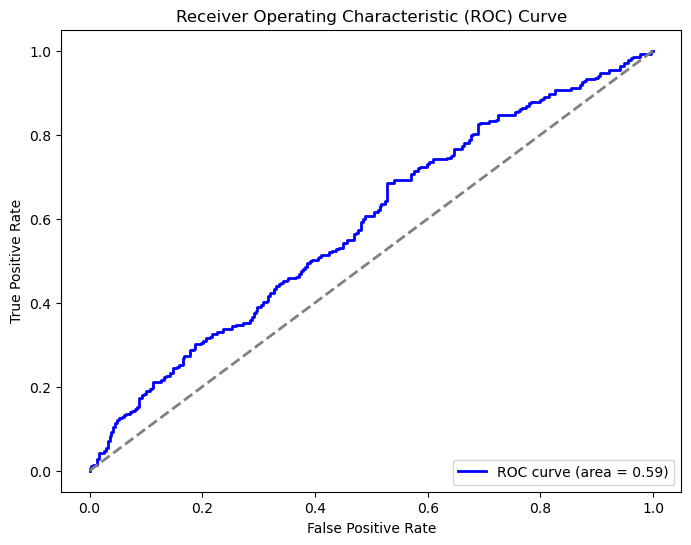

In [517]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_optimized)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Feature Importances

In [518]:
feature_importances.head(20)

home_pts_per_game            0.349909
away_pts_per_game            0.247666
home_opp_pts_per_game        0.221230
away_opp_pts_per_game        0.100621
home_pss_cmp_per_game       -0.088942
away_to_per_game             0.058818
home_yds_per_play_offense   -0.056811
away_pss_td_per_game         0.055931
weather_temperature         -0.053223
away_pen_fd_per_game        -0.052135
weather_wind_mph            -0.039365
stadium_neutral             -0.037667
division_game               -0.034815
home_yds_per_game           -0.034734
home_rsh_td_per_game         0.029786
adverse_weather             -0.028880
away_int_per_game            0.028593
home_rush_yds_per_att       -0.023351
stadium_surface_Grass       -0.021486
conference_game              0.019323
dtype: float64

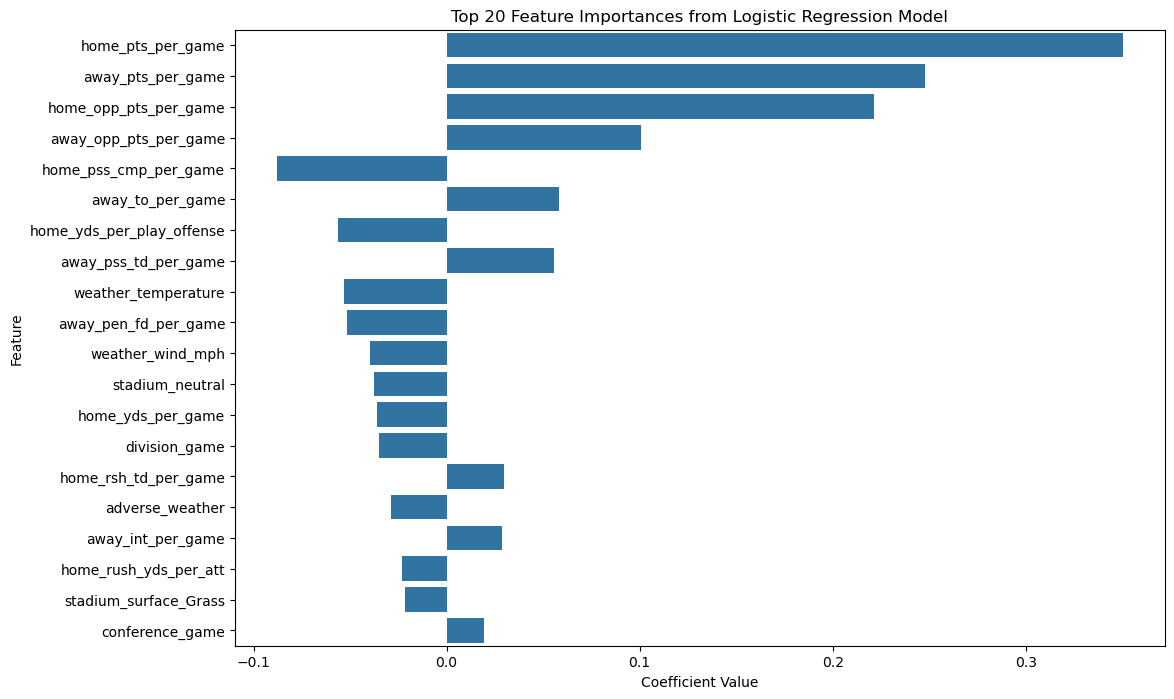

In [519]:
feature_importances = pd.Series(optimized_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

# Select top 20 most important features
top_features = feature_importances.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 20 Feature Importances from Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


## Betting Strategy Evaluation

In [520]:
bet_amount = 100
odds = -110
payout = bet_amount * (100 / -odds)
betting_threshold = 0.60

bets = y_pred_proba > betting_threshold

results = []
for i in range(len(y_test)):
    if bets[i]:
        if y_test.iloc[i] == 1:
            results.append(payout)
        else:
            results.append(-bet_amount)
    else:
        results.append(0)

total_profit_or_loss = sum(results)
print(f"Total Profit or Loss: ${total_profit_or_loss:.2f}")

total_bets = sum(bets)
total_wins = sum((bets) & (y_test == 1))
win_rate = total_wins / total_bets if total_bets > 0 else 0
print(f"Total Bets Placed: {total_bets}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Total Amount Bet: ${total_bets * bet_amount:.2f}")
print(f"Total Amount Won or Lost: ${total_profit_or_loss:.2f}")

Total Profit or Loss: $2745.45
Total Bets Placed: 110
Win Rate: 65.45%
Total Amount Bet: $11000.00
Total Amount Won or Lost: $2745.45


### Visualizing Profit over Time

In [523]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

bet_amount = 100
odds = -110
payout = bet_amount * (100 / abs(odds))
betting_threshold = 0.60

# Ensure y_pred_proba is a numpy array for boolean comparison
y_pred_proba = np.array(y_pred_proba)
y_test = np.array(y_test)

bets = y_pred_proba > betting_threshold

results = []
cumulative_profits = []
bet_counts = []  # to store the count of actual bets placed

total_profit = 0
total_bets = 0  # counter for the number of bets
for i in range(len(y_test)):
    if bets[i]:
        total_bets += 1
        if y_test[i] == 1:
            result = payout
        else:
            result = -bet_amount
    else:
        result = 0
    total_profit += result
    results.append(result)
    cumulative_profits.append(total_profit)
    bet_counts.append(total_bets)  # append the updated count

# Create a DataFrame for use with Plotly
data = pd.DataFrame({
    'Bet Number': np.arange(len(cumulative_profits)),
    'Cumulative Profit': cumulative_profits,
    'Bets Placed': bet_counts
})

# Create the plotly figure
initial_color = 'green' if cumulative_profits[0] >= 0 else 'red'
fig = go.Figure(
    layout=go.Layout(
        title="Profit Gained Over Time",
        xaxis=dict(title="Number of Bets"),
        yaxis=dict(title="Cumulative Profit"),
        updatemenus=[dict(type="buttons", showactive=False,
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, {"frame": {"duration": 100, "redraw": True},
                                                     "fromcurrent": True, "mode": "immediate"}]),
                                   dict(label="Pause",
                                        method="animate",
                                        args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                       "mode": "immediate",
                                                       "transition": {"duration": 0}}])
                          ])],
        annotations=[dict(text=f"Current Profit: ${cumulative_profits[0]:.2f}", 
                          showarrow=False, x=0.5, y=1.1, xref='paper', yref='paper', 
                          font=dict(size=16, color=initial_color)),
                     dict(text=f"Number of Bets Placed: {bet_counts[0]}", 
                          showarrow=False, x=0.5, y=1.15, xref='paper', yref='paper', 
                          font=dict(size=16, color="black"))]
    ),
    data=[go.Scatter(x=data['Bet Number'], y=data['Cumulative Profit'], 
                     mode='lines', line=dict(width=2, color=initial_color))]
)

frames = []
for k in range(len(data)):
    color = 'green' if cumulative_profits[k] >= 0 else 'red'
    frames.append(go.Frame(
        data=[go.Scatter(x=data['Bet Number'][:k+1], y=data['Cumulative Profit'][:k+1], 
                         mode='lines', line=dict(width=2, color=color))],
        layout=go.Layout(annotations=[dict(text=f"Current Profit: ${cumulative_profits[k]:.2f}", 
                                           showarrow=False, x=0.5, y=1.1, xref='paper', yref='paper', 
                                           font=dict(size=16, color=color)),
                                      dict(text=f"Number of Bets Placed: {bet_counts[k]}", 
                                           showarrow=False, x=0.5, y=1.15, xref='paper', yref='paper', 
                                           font=dict(size=16, color="black"))])
    ))

fig.frames = frames

# Display the figure
fig.show()
